In [1]:
import analysis
import hrf_tools

/opt/miniconda-latest/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "
pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [2]:
subject=100610
feature='as_scores'
n_movies=[1]
X,Y,vertex_info = analysis.load_data_HCP(subject,feature,n_movies)

pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [3]:
Y.shape

(798, 170494)

In [6]:
X = hrf_tools.apply_optimal_hrf_10hz(X,1)

In [7]:
scores_mean,corr_mean,weights_mean = analysis.simple_ridgeCV(X,Y)

In [12]:
analysis.plot_results(scores_mean,'r2','59k',vertex_info,100610,'as_scores','HCP_7T','ridgeCV')

NameError: name 'scores_mean' is not defined

## Debugging plotting different in script vs notebook

In [80]:
analysis.plot_results(Y[0,:],'r2','59k',vertex_info,100610,'as_scores','HCP_7T','ridgeCV')

Cannot load file ../sourcedata/data/human-connectome-project-openaccess/HCP1200/100610/T1w/fsaverage_LR59k/100610.sulc_1.6mm_MSMAll.59k_fs_LR.dscalar.nii with sulcal depth data


/scratch/scratch/Fri/jsmentch/nat_img/code/nilearn_plotting_custom.py:184: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  axes = Axes3D(figure, rect=[0, 0, 1, 1],


[-7.59531117 -7.57845253 -7.48154272 ...  6.10457205  6.1344305
  6.68977301]
[-7.44902555 -7.43706446 -7.31155254 ...  5.74735557  6.08599753
  6.2385826 ]
[-7.59531117 -7.57845253 -7.48154272 ...  6.10457205  6.1344305
  6.68977301]
[-7.44902555 -7.43706446 -7.31155254 ...  5.74735557  6.08599753
  6.2385826 ]


In [5]:
import numpy as np
import nibabel as nb
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from nilearn_plotting_custom import plot_surf
from PIL import Image
from PIL import ImageDraw
import npp
import hcp_utils as hcp
from hcp_tools import load_flatmaps_59k
from hcp_tools import load_meshes
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import resample
from sklearn.preprocessing import StandardScaler
sns.set("paper", "white")
#%matplotlib inline
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

In [11]:
%matplotlib inline

In [19]:
dataset='HCP_7T'
save_dir=f'../outputs/figures/{dataset}/'
scratch_dir = '/scratch/scratch/Fri/jsmentch/tmp'

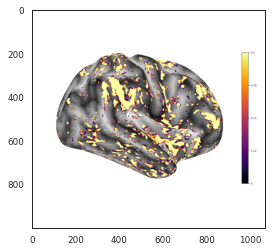

In [81]:
img = Image.open(f'{scratch_dir}/vinf_R.png')
plt.imshow(img)

In [82]:
img.size

(1070, 1000)

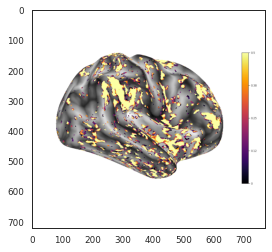

In [83]:
img = Image.open(f'{scratch_dir}/notebook/vinf_R.png')
plt.imshow(img)

In [84]:
img.size

(770, 720)

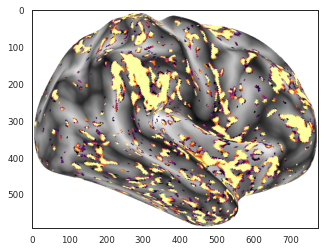

In [77]:
area = (105, 190, 880, 780) #area to crop from each image
cropped = img.crop(area)
plt.imshow(cropped)

In [78]:
img = Image.open(f'{scratch_dir}/flat_L.png',mode='r')
cropped = img.crop(area)
fL=cropped.transpose(Image.FLIP_LEFT_RIGHT)
w,h = img.size
c_area = (690, 0, w-10, h) # area of colorbar to crop
cbar = img.crop(c_area)

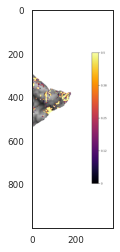

In [79]:
plt.imshow(cbar)

In [14]:
fL.save(f'{save_dir}/fL.png')

In [15]:
img.size

(1070, 1000)

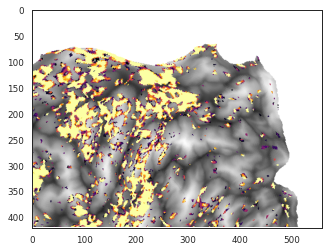

In [18]:
plt.imshow(fL)